LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install category_encoders
import category_encoders as ce
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.6 MB/s eta 0:00:00


DATASET

In [ ]:
strokeds = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokeds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Analisis Deskriptif
strokeds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Tipe Data
strokeds.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
#Cek Missing Values
miss_val = strokeds.isnull().sum()/len(strokeds)*100
print(miss_val)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


terdapat missing value dari data BMI, maka perlu penanganan lebih lanjut.

In [ ]:
#isi missing value BMI dengan rata-rata
strokeds['bmi'] = strokeds['bmi'].fillna(strokeds['bmi'].mean())
strokeds.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


sudah tidak ada missing value di variabel BMI

In [ ]:
#Nilai Unik
for column in strokeds.columns:
  unique_values = strokeds[column].unique()
  print(f"Kolom: {column}")
  print(f"Nilai unik: {unique_values}")
  print(f"Jumlah Nilai Unik: {len(unique_values)}\n")

Kolom: id
Nilai unik: [ 9046 51676 31112 ... 19723 37544 44679]
Jumlah Nilai Unik: 5110

Kolom: gender
Nilai unik: ['Male' 'Female' 'Other']
Jumlah Nilai Unik: 3

Kolom: age
Nilai unik: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1

Ada nilai "other" pada gender, maka untuk hasil "other" diganti dengan modus dari data yang ada. lalu, dicari jumlah kategori "unknown" pada variabel "smoking status", jika tidak terlalu banyak maka diganti dengan nilai modus variabel "smoking status"

In [ ]:
#Menghitung jumlah variabel
num_other = strokeds[strokeds['gender']=='Other'].shape[0]
num_unkwon = strokeds[strokeds['smoking_status']=='Unknown'].shape[0]
print(f"Jumlah Other dalam kolom 'gender: {num_other}")
print(f"Jumlah Unknown dalam kolom 'smoking_status': {num_unkwon}")

Jumlah Other dalam kolom 'gender: 1
Jumlah Unknown dalam kolom 'smoking_status': 1544


jadi, untuk variabel smoking status yang berkategori "Unknown" dibiarkan saja agar tidak salah dalam prediksi. lalu, untuk "Other" di gender perlu dilakukan penggantian ke modus dari gender

In [ ]:
#Mengganti Kategori Other
strokeds['gender'] = strokeds['gender'].replace('Other', np.nan)
strokeds['gender'] = strokeds['gender'].fillna(strokeds['gender'].mode()[0])

In [ ]:
#Cek Kembali
strokeds['gender'].unique()

array(['Male', 'Female'], dtype=object)

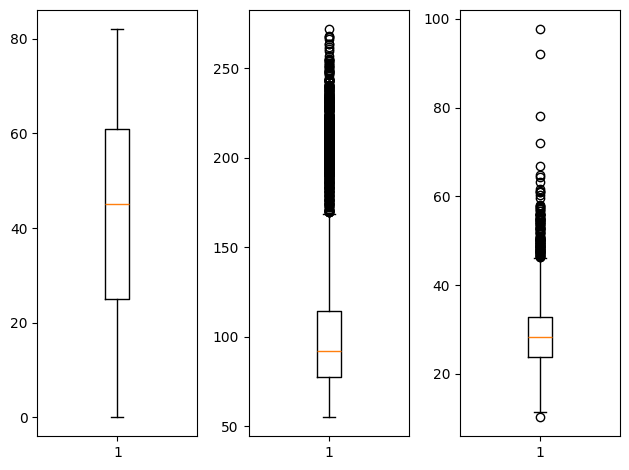

In [ ]:
#Cek outlier pada Age, avg_glucose_level, BMI
plt.subplot(1, 3, 1)
plt.boxplot(strokeds['age'])
plt.subplot(1, 3, 2)
plt.boxplot(strokeds['avg_glucose_level'])
plt.subplot(1, 3, 3)
plt.boxplot(strokeds['bmi'])
plt.tight_layout()
plt.show()

terdapat banyak outlier dalam data, namun tidak akan dihapus untuk menghindari hilangnya informasi pada data

In [ ]:
#Simpan data hasil preprocessing untuk pembuatan dashboard
file_path = '/content/stroke_preprocessed.xlsx'
strokeds.to_excel(file_path, index=False)

In [ ]:
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Statistika Deskriptif
strokeds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Feature Selection

In [ ]:
encode = strokeds
encode['gender'].replace({'Male':0,'Female':1},inplace=True)
encode['ever_married'].replace({'No':0,'Yes':1},inplace=True)
# Explicitly convert to string, then replace, then convert to int to ensure full numerical conversion
encode['work_type'] = encode['work_type'].astype(str).replace({'children':0,'Govt_job':1,'Never_worked':2,'Private':3,'Self-employed':4}).astype(int)
encode['Residence_type'].replace({'Rural':0,'Urban':1},inplace=True)
encode['smoking_status'].replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3},inplace=True)
encode.head()

/tmp/ipython-input-2395496269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encode['gender'].replace({'Male':0,'Female':1},inplace=True)
/tmp/ipython-input-2395496269.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encode['gender'].replace({'Male':0,'Female':1},inplace=True)
/tmp/ipython-i

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,3,1,228.69,36.600000,0,1
1,51676,1,61.0,0,0,1,4,0,202.21,28.893237,1,1
2,31112,0,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,60182,1,49.0,0,0,1,3,1,171.23,34.400000,2,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.000000,1,1


In [ ]:
#Cek Data Unik
for column in encode.columns:
  unique_values = encode[column].unique()
  print(f"Kolom: {column}")
  print(f"Nilai unik: {unique_values}")
  print(f"Jumlah nilai unik: {len(unique_values)}\n")

Kolom: id
Nilai unik: [ 9046 51676 31112 ... 19723 37544 44679]
Jumlah nilai unik: 5110

Kolom: gender
Nilai unik: [0 1]
Jumlah nilai unik: 2

Kolom: age
Nilai unik: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.4

In [ ]:
#Memisahkan fitur dan target
datafix = encode.drop('id', axis=1)
X = datafix.drop('stroke', axis=1)
y = datafix['stroke']

In [ ]:
X_encoded = X.copy()
le = LabelEncoder()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

In [ ]:
for col in X.columns:
    print(col, X[col].apply(type).unique())

gender [<class 'int'>]
age [<class 'float'>]
hypertension [<class 'int'>]
heart_disease [<class 'int'>]
ever_married [<class 'int'>]
work_type [<class 'int'>]
Residence_type [<class 'int'>]
avg_glucose_level [<class 'float'>]
bmi [<class 'float'>]
smoking_status [<class 'int'>]


In [ ]:
#1. Chi Square Test (categorical variable)
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_encoded,y)
chi2_scores = chi2_selector.scores_

#2. Mutual Information
mi_selector = SelectKBest(mutual_info_classif, k='all')
mi_selector.fit(X_encoded,y)
mi_scores = mi_selector.scores_

#3. Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_encoded,y)
rf_importances = rf.feature_importances_

#Printing feature scores
feature_names = X.columns
print("Chi-square Scores:")
for feature, score in zip(feature_names, chi2_scores):
  print(f"{feature}: {score}")

print("\nMutual Information Scores:")
for feature, score in zip(feature_names, mi_scores):
  print(f"{feature}: {score}")

print("\nRandom Forest Feature Importance Scores:")
for feature, score in zip(feature_names, rf_importances):
  print(f"{feature}: {score}")

Chi-square Scores:
gender: 0.17580408216864069
age: 3635.2269112802096
hypertension: 75.44949772047296
heart_disease: 87.98743631838275
ever_married: 20.622786836394678
work_type: 23.80454104827521
Residence_type: 0.6007170234939083
avg_glucose_level: 1718.2854458188158
bmi: 15.894122342649805
smoking_status: 16.95377721828956

Mutual Information Scores:
gender: 0.0
age: 0.04395921473971365
hypertension: 0.00547760571102307
heart_disease: 0.0
ever_married: 0.002754187564604882
work_type: 0.009435048550899161
Residence_type: 0.0018192856388772327
avg_glucose_level: 0.0057962221739145114
bmi: 0.00822531120270975
smoking_status: 0.0024077900032049016

Random Forest Feature Importance Scores:
gender: 0.03214049828949301
age: 0.2331429358821048
hypertension: 0.022791336733000864
heart_disease: 0.022527245271267017
ever_married: 0.017290450206382316
work_type: 0.047126598587004014
Residence_type: 0.03238640473880681
avg_glucose_level: 0.28964176316316675
bmi: 0.23596943787570174
smoking_stat

- Chi-square Test: mengukur ketergantungan antara fitur kategorikal dan variabel target. Nilai yang lebih tinggi menunjukkan fitur yang lebih signifikan

- Mutual Information: Mengukur ketergantungan antara variabel secara umum, baik kategorikal maupun numerik. Nilai yang lebih tinggi menunjukkan ketergantungan yang lebih besar

- Random Forest Feature Importance: Mengukur pentingnya fitur berdasarkan pengurangan impurity di dalam pohon keputusan. Nilai yang lebih tinggi menunjukkan fitur yang lebih berpengaruh dalam model.

Jadi, hasil didapatkan bahwa perlu menghapus 2 variabel yang tidak terlalu kuat hubungannya dengan variabel respon, yaitu variabel gender dan residence type

In [ ]:
#Pembagian feature selection kategorik dan numerik
#Memisahkan fitur dan target

datafix = encode.drop('id', axis=1)
X1 = datafix.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'], axis=1)
y1 = datafix['stroke']

In [ ]:
#1. Chi Square Test (categorical variable)
chi2_selector1 = SelectKBest(chi2, k='all')
chi2_selector1.fit(X1,y)
chi2_scores1 = chi2_selector.scores_

#2. Mutual Information
mi_selector1 = SelectKBest(mutual_info_classif, k='all')
mi_selector1.fit(X1,y)
mi_scores1 = mi_selector.scores_

#3. Random Forest Feature Importance
rf1 = RandomForestClassifier(n_estimators=100)
rf1.fit(X1,y)
rf_importances1 = rf1.feature_importances_

#Printing feature scores
feature_names1 = X1.columns
print("Chi-square Scores:")
for feature, score in zip(feature_names1, chi2_scores):
  print(f"{feature}: {score}")

print("\nMutual Information Scores:")
for feature, score in zip(feature_names1, mi_scores1):
  print(f"{feature}: {score}")

print("\nRandom Forest Feature Importance Scores:")
for feature, score in zip(feature_names1, rf_importances1):
  print(f"{feature}: {score}")

Chi-square Scores:
gender: 0.17580408216864069
hypertension: 3635.2269112802096
heart_disease: 75.44949772047296
ever_married: 87.98743631838275
work_type: 20.622786836394678
Residence_type: 23.80454104827521
smoking_status: 0.6007170234939083

Mutual Information Scores:
gender: 0.0
hypertension: 0.04395921473971365
heart_disease: 0.00547760571102307
ever_married: 0.0
work_type: 0.002754187564604882
Residence_type: 0.009435048550899161
smoking_status: 0.0018192856388772327

Random Forest Feature Importance Scores:
gender: 0.09349296157379262
hypertension: 0.1201887305521412
heart_disease: 0.133737267726342
ever_married: 0.09765397503594161
work_type: 0.20176366954781405
Residence_type: 0.10747033171444366
smoking_status: 0.24569306384952494


In [ ]:
#Analisis Numerik Feature Selection
#Selecting numerical features
X2 = datafix[['age', 'avg_glucose_level', 'bmi']]

#standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

#Seleksi fitur menggunakan ANOVA f-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)

#Melihat skor ANOVA F-test untuk setiap fitur
scores = selector.scores_
p_values = selector.pvalues_

#Membuat DataFrame untuk hasil seleksi fitur
feature_scores = pd.DataFrame({
    'Feature' : X2.columns,
    'ANOVA F-Score': scores,
    'P-Values': p_values
})

print(feature_scores)

             Feature  ANOVA F-Score      P-Values
0                age     326.916568  7.030778e-71
1  avg_glucose_level      90.503870  2.767811e-21
2                bmi       7.759776  5.361957e-03


Karena keseluruhan p-value kurang dari 0.05, maka seluruh variabel numerik digunakan dalam analisis klasifikasi.

Jadi, yang digunakan dalam analisis klasifikasi adalah variabel gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose, level, bmi, smoking_status

In [ ]:
#Metode RFE

#standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Definisikan estimator (logistic regression)
estimator = LogisticRegression()

#Gunakan RFE untuk seleksi fitur, memilih 2 fitur terbaik
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X_scaled, y)

#lihat fitur yang dipilih
selected_features = X.columns[selector.support_]
print("Fitur yang dipilih:", selected_features)

#melihat ranking dari semua fitur
ranking = selector.ranking_
print("Ranking fitur:", ranking)

Fitur yang dipilih: Index(['age', 'avg_glucose_level'], dtype='object')
Ranking fitur: [7 1 2 5 4 3 6 1 9 8]


FEATURE SELECTION FIX

In [ ]:
# 1. RFE with Logistic Regression
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=8)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = datafix.columns[rfe.get_support(indices=True)].tolist()

df_rfe = pd.DataFrame(X_rfe, columns=selected_features_rfe)
df_rfe['target']=y
df_rfe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,target
0,0.0,67.0,0.0,1.0,1.0,3.0,1.0,0.0,1
1,1.0,61.0,0.0,0.0,1.0,4.0,0.0,1.0,1
2,0.0,80.0,0.0,1.0,1.0,3.0,0.0,1.0,1
3,1.0,49.0,0.0,0.0,1.0,3.0,1.0,2.0,1
4,1.0,79.0,1.0,0.0,1.0,4.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1.0,0.0,1.0,3.0,1.0,1.0,0
5106,1.0,81.0,0.0,0.0,1.0,4.0,1.0,1.0,0
5107,1.0,35.0,0.0,0.0,1.0,4.0,0.0,1.0,0
5108,0.0,51.0,0.0,0.0,1.0,3.0,0.0,0.0,0


In [ ]:
selected_features_rfe

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
# 2. Feature importance from Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X, y)
importances = tree.feature_importances_
indices_tree = importances.argsort()[-8:][::-1]
selected_features_tree = datafix.columns[indices_tree].tolist()

X_tree = X.iloc[:, indices_tree]
df_tree = pd.DataFrame(X_tree, columns=selected_features_tree)
df_tree['target']=y
df_tree

,avg_glucose_level,bmi,age,smoking_status,gender,work_type,hypertension,Residence_type,target
0,228.69,36.600000,67.0,0,0,3,0,1,1
1,202.21,28.893237,61.0,1,1,4,0,0,1
2,105.92,32.500000,80.0,1,0,3,0,0,1
3,171.23,34.400000,49.0,2,1,3,0,1,1
4,174.12,24.000000,79.0,1,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...
5105,83.75,28.893237,80.0,1,1,3,1,1,0
5106,125.20,40.000000,81.0,1,1,4,0,1,0
5107,82.99,30.600000,35.0,1,1,4,0,0,0
5108,166.29,25.600000,51.0,0,0,3,0,0,0


In [ ]:
# 3. Feature importance from Random Forest
forest = RandomForestClassifier()
forest.fit(X, y)
importances_rf = forest.feature_importances_
indices_rf = importances_rf.argsort()[-8:][::-1]
selected_features_rf = datafix.columns[indices_rf].tolist()

X_rf = X.iloc[:, indices_rf]
df_rf = pd.DataFrame(X_rf, columns=selected_features_rf)
df_rf['target'] = y
df_rf

,avg_glucose_level,bmi,age,smoking_status,work_type,Residence_type,gender,hypertension,target
0,228.69,36.600000,67.0,0,3,1,0,0,1
1,202.21,28.893237,61.0,1,4,0,1,0,1
2,105.92,32.500000,80.0,1,3,0,0,0,1
3,171.23,34.400000,49.0,2,3,1,1,0,1
4,174.12,24.000000,79.0,1,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...
5105,83.75,28.893237,80.0,1,3,1,1,1,0
5106,125.20,40.000000,81.0,1,4,1,1,0,0
5107,82.99,30.600000,35.0,1,4,0,1,0,0
5108,166.29,25.600000,51.0,0,3,0,0,0,0


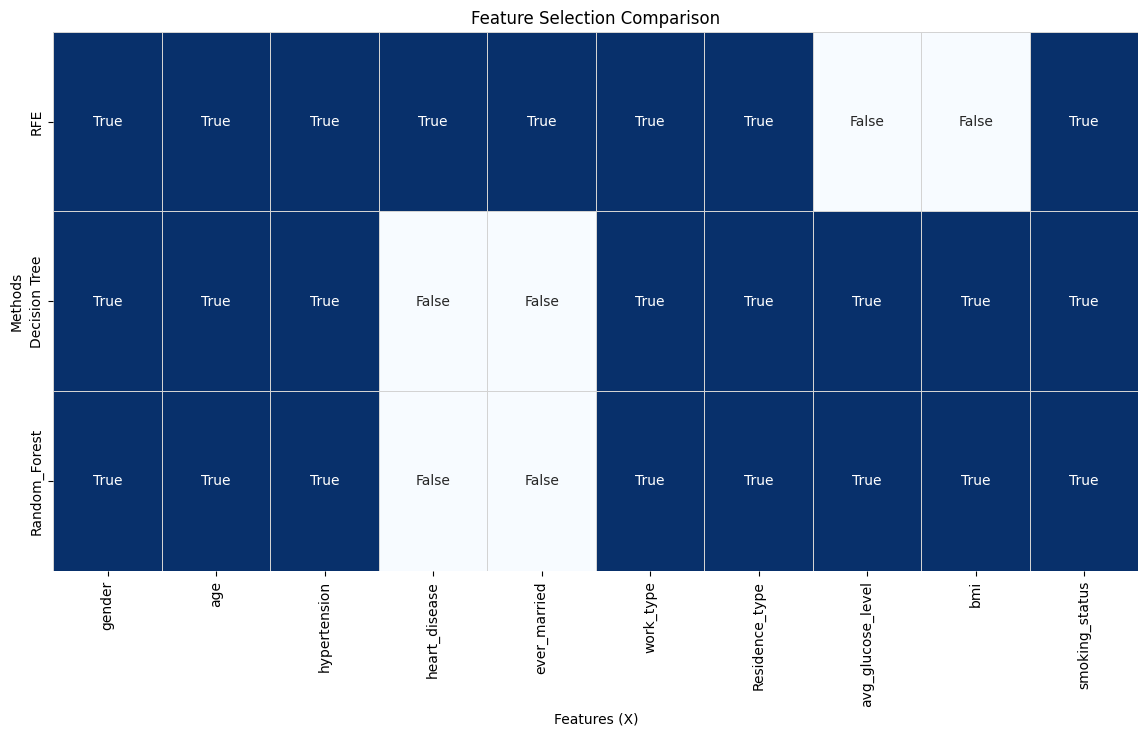

In [ ]:
# Grafik

#All features
all_features = datafix.columns[:-1].tolist() # Ensure it's a list for direct use as columns

# Initialize comparison DataFrame with methods as index and all features as columns
comparison_df = pd.DataFrame(columns=all_features)

# Initialize rows for each method with False (no feature selected by default)
comparison_df.loc['RFE'] = False
comparison_df.loc['Decision Tree'] = False
comparison_df.loc['Random_Forest'] = False

# Mark selected features as True
comparison_df.loc['RFE', selected_features_rfe] = True
comparison_df.loc['Decision Tree', selected_features_tree] = True
comparison_df.loc['Random_Forest', selected_features_rf] = True

# Data for heatmap colors (convert boolean to integer 0/1)
heatmap_values = comparison_df.astype(int)

# Convert boolean DataFrame to string DataFrame for annotation
annotation_df = comparison_df.astype(str)

plt.figure(figsize=(14,7))

# Draw a heatmap
sns.heatmap(heatmap_values, annot=annotation_df, fmt='s', cmap='Blues', cbar=False, linewidths=.5, linecolor='lightgray')

plt.title('Feature Selection Comparison')
plt.xlabel('Features (X)')
plt.ylabel('Methods')
plt.show()

# Metode Klasifikasi

Repeated Holdout Results:
Logistic Regression - Accuracy: 0.942, Precision: 0.000
Random Forest - Accuracy: 0.941, Precision: 0.000
Naive Bayes - Accuracy: 0.862, Precision: 0.192


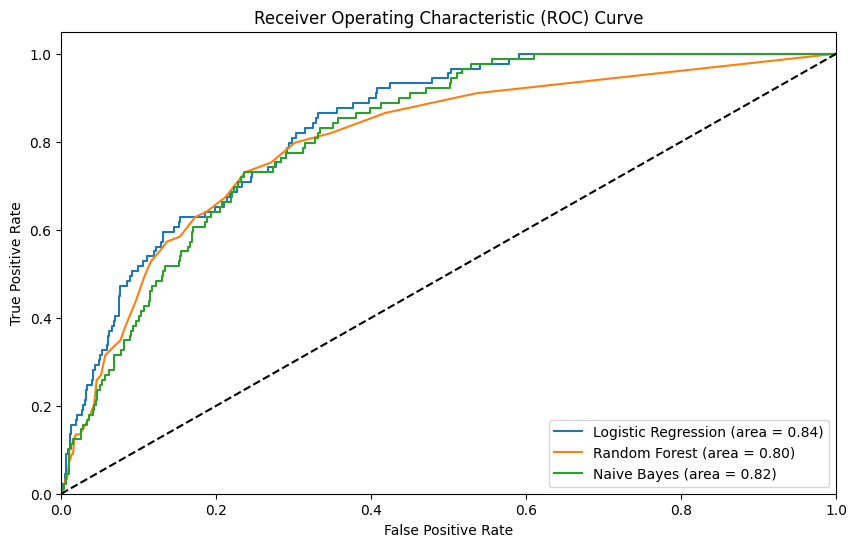

In [ ]:
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.preprocessing import StandardScaler # Import StandardScaler

#definisi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), # Increase max_iter
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

#1. Repeated Holdout
print("Repeated Holdout Results:")
plt.figure(figsize=(10,6))

# Scale the features once before the loop
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for name, model in models.items():
  accuracies = []
  precisions = []
  recalls = []
  f1s = []
  aucs = []
  specificities = []
  for _ in range(10): # 10 repetition
    # Split the scaled data
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0)) # Handle zero division for precision
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))
    if y_prob is not None and len(np.unique(y_test)) > 1: # Ensure enough classes for ROC AUC
        aucs.append(roc_auc_score(y_test, y_prob))
    else:
        aucs.append(np.nan)

  #calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else np.nan
    specificities.append(specificity)
  print(f"{name} - Accuracy: {np.mean(accuracies):.3f}, Precision: {np.mean(precisions):.3f}")

  #plot ROC Curve
  if y_prob is not None and len(np.unique(y_test)) > 1: # Ensure enough classes for ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

#finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


K-Fold Cross-Validation Results (k=5):
Logistic Regression - Accuracy : 0.951, Precision : 0.000
Random Forest - Accuracy : 0.950, Precision : 0.000
Naive Bayes - Accuracy : 0.881, Precision : 0.164


/tmp/ipython-input-636351964.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--')


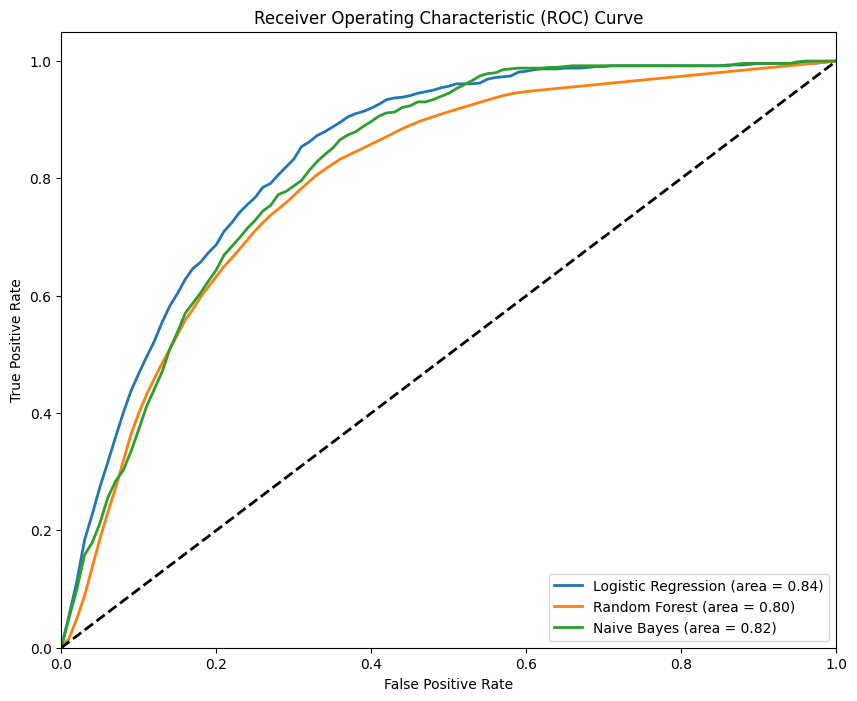

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes' : GaussianNB()
}

#2. K-Fold Cross-Validation
print("\nK-Fold Cross-Validation Results (k=5):")
k = 5
cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=3, random_state=1)

#Plot ROC curve
plt.figure(figsize=(10,8))

# Scale the features once before the loop
scaler = StandardScaler()
X_rf_scaled = scaler.fit_transform(X_rf)

for name, model in models.items():
  accuracies = []
  precisions = []
  recalls = []
  f1s = []
  aucs = []
  specificities = []

  #Untuk ROC curve
  tprs = []
  base_fpr = np.linspace(0,1,101)

  for train_index, test_index in cv.split(X_rf_scaled, y): # Use scaled X_rf
    X_Train, X_Test = X_rf_scaled[train_index], X_rf_scaled[test_index] # X_rf_scaled is a numpy array, use array indexing
    y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_Train, y_Train)
    y_pred = model.predict(X_Test)
    y_prob = model.predict_proba(X_Test)[:, 1]
    accuracies.append(model.score( X_Test, y_Test))
    precisions.append(precision_score(y_Test, y_pred, zero_division=0))
    recalls.append(recall_score(y_Test, y_pred, zero_division=0))
    f1s.append(f1_score(y_Test, y_pred, zero_division=0))
    aucs.append(roc_auc_score(y_Test, y_prob))

    tn, fp, fn, tp = confusion_matrix(y_Test, y_pred).ravel()
    specificities.append(tn / (tn + fp) if (tn + fp) != 0 else np.nan)

    #Hitung ROC utk setiap fold dan interpolasi tpr
    fpr, tpr, _ = roc_curve(y_Test, y_prob)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

  #Rata-rata ROC curve
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(base_fpr, mean_tpr)

  plt.plot(base_fpr, mean_tpr, lw=2, label=f'{name} (area = {mean_auc:.2f})')

  print(f"{name} - Accuracy : {np.mean(accuracies):.3f}, Precision : {np.mean(precisions):.3f}")

#Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## UnderSampling


karena data imbalanced yaitu data orang yang terkena stroke lebih sedikit daripada orang yang tidak terkena stroke, bahkan jaraknya sangat jauh maka dilakukan undersampling agar datanya memiliki kuantitas yang sama antara kategori 0 (tidak terkena stroke) dan kategori 1 (terkena stroke).

In [ ]:
import numpy as np
from sklearn.utils import resample
from collections import Counter

# Assumming X is a pandas DataFrame or any other data structure
X_rf1 = X_rf.values # Convert X to numpy array

# Assumming y is a pandas series or any other data structure
# y is already a numpy array from previous operations, so no need to call .values again
# y = y.values # Convert y to numpy array

# Combine X and y into a single numpy array for easier manipulation
data = np.column_stack((X_rf1, y))

# Separate majority and minority classes
majority_class = data[data[:, -1] == 0]
minority_class = data[data[:, -1] == 1]

# Count number of minority samples
n_minority_samples = len(minority_class)

# Undersampling majority class randomly
undersampled_majority_class = resample(majority_class,
                                       replace=False,
                                       n_samples=n_minority_samples,
                                       random_state=42)

# Combine undersampled majority class with minority class
undersampled_data = np.concatenate((undersampled_majority_class, minority_class), axis=0)

# Separate X_resampled and y_resampled
X_resampled = undersampled_data[:, :-1]
y_resampled = undersampled_data[:, -1]

# Display class distribution after undersampling
print("Counter before undersampling:", Counter(y))
print("Counter after undersampling:", Counter(y_resampled))

Counter before undersampling: Counter({0: 4861, 1: 249})
Counter after undersampling: Counter({np.float64(0.0): 249, np.float64(1.0): 249})


Setelah dilakukan undersampling didapatkan jumlah data yang berkategori 0 sebanyak 249 data juga. selanjutnya, dilakukan analisis regresi logistik, random forest, dan naive bayes

Repeated Holdout Results:
Logistic Regression - Accuracy: 0.696, Precision: 0.697
Random Forest - Accuracy: 0.712, Precision: 0.712
Naive Bayes - Accuracy: 0.728, Precision: 0.727


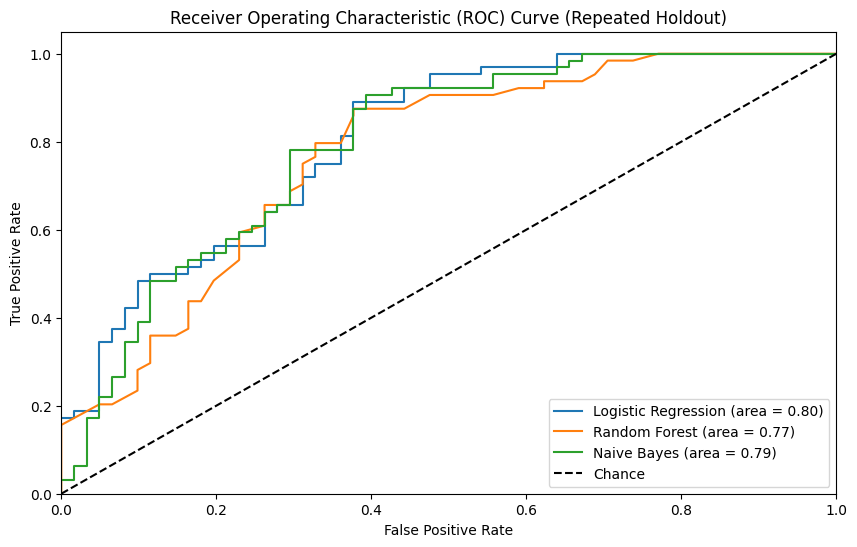

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, auc, roc_curve

# Defenisikan model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000), # Increased max_iter
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# 1.Repeated Holdout
print("Repeated Holdout Results:")
plt.figure(figsize=(10,6)) # set figure size for ROC plot

# Scale the resampled data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

for name, model in models.items():
  accuracies = []
  precisions = []
  recalls = []
  f1s = []
  aucs = []
  specificities = []
  y_prob_collector = [] # To collect y_prob for ROC plotting outside the inner loop
  y_test_collector = [] # To collect y_test for ROC plotting outside the inner loop

  for _ in range(10): # 10 repetition
      X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled_scaled, y_resampled, random_state=42) # Use scaled data
      model.fit(X_train1, y_train1)
      y_pred1 = model.predict(X_test1)
      y_prob1 = model.predict_proba(X_test1)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test1)
      accuracies.append(accuracy_score(y_test1, y_pred1))
      precisions.append(precision_score(y_test1, y_pred1, zero_division=0))
      recalls.append(recall_score(y_test1, y_pred1, zero_division=0))
      f1s.append(f1_score(y_test1, y_pred1, zero_division=0))

      if y_prob1 is not None and len(np.unique(y_test1)) > 1:
          aucs.append(roc_auc_score(y_test1, y_prob1))
          y_prob_collector.extend(y_prob1) # Store probabilities for average ROC
          y_test_collector.extend(y_test1) # Store true labels for average ROC
      else:
          aucs.append(np.nan) # handle case where ROC AUC cannot be calculated

      # Calculate specifity
      tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()
      specificity = tn / (tn + fp) if (tn + fp) != 0 else np.nan
      specificities.append(specificity)

  print(f"{name} - Accuracy: {np.mean(accuracies):.3f}, Precision: {np.mean(precisions):.3f}")

  # Plot ROC Curve for each model (using the last split or accumulated probabilities)
  if y_prob_collector and len(np.unique(y_test_collector)) > 1:
      fpr, tpr, _ = roc_curve(y_test_collector, y_prob_collector)
      roc_auc = auc(fpr, tpr)
      plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Repeated Holdout)')
plt.legend(loc='lower right')
plt.show()

Menggunakan repeat holdout method didapatkan untuk masing masing metode nilai presisi, recall, dan f1-scorenya jauh lebih tinggi dibandingkan hasil tanpa dilakukan undersampling


K-Fold Cross-Validation Results (k=5):
Logistic Regression - Accuracy : 0.754, Precision : 0.732
Random Forest - Accuracy : 0.736, Precision : 0.719
Naive Bayes - Accuracy : 0.734, Precision : 0.713


/tmp/ipython-input-907811697.py:65: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--')


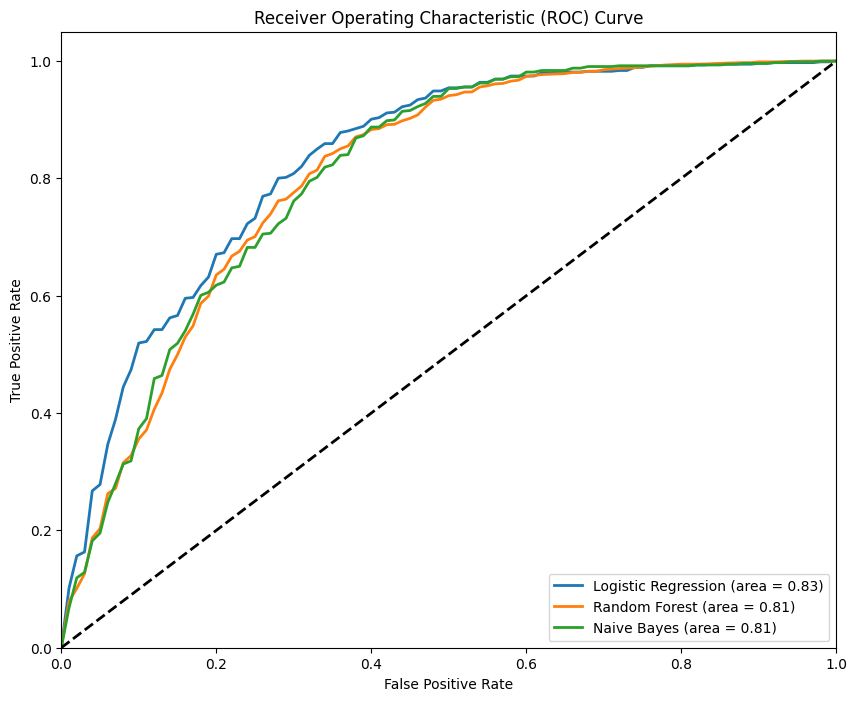

In [ ]:
# Defenisikan model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'Naive Bayes' : GaussianNB()
}

# 2.K-Folds Cross-Validation
print("\nK-Fold Cross-Validation Results (k=5):")
k = 5
cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=3, random_state=1)

#Plot ROC curve
plt.figure(figsize=(10,8))

# Scale the resampled data once
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

for name, model in models.items():
  accuracies = []
  precisions = []
  recalls = []
  f1s = []
  aucs = []
  specifities = []

  #Untuk ROC curve
  tprs = []
  base_fpr = np.linspace(0,1,101)

  for train_index, test_index in cv.split(X_resampled_scaled, y_resampled):
    X_Train2, X_Test2 = X_resampled_scaled[train_index], X_resampled_scaled[test_index]
    y_Train2, y_Test2 = y_resampled[train_index], y_resampled[test_index]

    model.fit(X_Train2, y_Train2)
    y_pred2 = model.predict(X_Test2)
    y_prob2 = model.predict_proba(X_Test2)[:, 1]

    accuracies.append(model.score( X_Test2, y_Test2))
    precisions.append(precision_score(y_Test2, y_pred2, zero_division=0))
    recalls.append(recall_score(y_Test2, y_pred2, zero_division=0))
    f1s.append(f1_score(y_Test2, y_pred2, zero_division=0))
    aucs.append(roc_auc_score(y_Test2, y_prob2))

    tn, fp, fn, tp = confusion_matrix(y_Test2, y_pred2).ravel()
    specificities.append(tn / (tn + fp) if (tn + fp) != 0 else np.nan)

    #Hitung ROC utk setiap fold dan interpolasi tpr
    fpr, tpr, _ = roc_curve(y_Test2, y_prob2)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

  #Rata-rata ROC curve
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(base_fpr, mean_tpr)

  plt.plot(base_fpr, mean_tpr, lw=2, label=f'{name} (area = {mean_auc:.2f})')

  print(f"{name} - Accuracy : {np.mean(accuracies):.3f}, Precision : {np.mean(precisions):.3f}")

#Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Menggunakan K-fold method didapatkan untuk masing masing metode nilai presisi, recall, dan f1- scorenya jauh lebih tinggi dibandingkan hasil tanpa dilakukan undersampling